In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-power-generation-data-forecasting/Location2.csv
/kaggle/input/wind-power-generation-data-forecasting/readme.txt
/kaggle/input/wind-power-generation-data-forecasting/Location3.csv
/kaggle/input/wind-power-generation-data-forecasting/Location1.csv
/kaggle/input/wind-power-generation-data-forecasting/Location4.csv


In [2]:
df=pd.read_csv('/kaggle/input/wind-power-generation-data-forecasting/Location1.csv')

In [3]:
df

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793
...,...,...,...,...,...,...,...,...,...,...
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606


In [4]:
df['Time']=pd.to_datetime(df['Time'])

In [5]:
df.corr()['Power'].sort_values(ascending=False)

Power                  1.000000
windspeed_100m         0.778704
windspeed_10m          0.732801
windgusts_10m          0.662677
winddirection_100m     0.171619
winddirection_10m      0.157623
Time                  -0.011625
relativehumidity_2m   -0.070360
temperature_2m        -0.207101
dewpoint_2m           -0.223739
Name: Power, dtype: float64

In [6]:
df=df.set_index('Time')

In [7]:
df['Power']=(df['Power']-df['Power'].shift(1)).apply(lambda x:1 if x>0 else 0)

In [8]:
df

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,1
2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,1
2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,1


In [9]:
def df_to_Xy(df,lag):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df)-lag):
        rows=[[r] for r in df_as_np[i:i+lag]]
        label=df_as_np[i+lag,df.columns.get_loc('Power')]
        X.append(rows)
        y.append(label)
    return np.array(X), np.array(y)

In [10]:
X,y=df_to_Xy(df,50)

In [11]:
X.shape,y.shape

((43750, 50, 1, 9), (43750,))

In [12]:
train_idx=int(len(X)*0.8)
val_idx=int(len(X)*0.9)

X_train,y_train=X[:train_idx] ,y[:train_idx]
X_val,y_val=X[train_idx:val_idx], y[train_idx:val_idx]
X_test,y_test=X[val_idx:], y[val_idx:]

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_val=X_val.reshape(X_val.shape[0], X_val.shape[1], -1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((35000, 50, 9), (35000,), (4375, 50, 9), (4375,), (4375, 50, 9), (4375,))

# Building LSTM Model

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer
from keras.optimizers import Adam

In [14]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(50, 9)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18944     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
547/547 [==============================] - 18s 28ms/step - loss: 0.6690 - accuracy: 0.5929 - val_loss: 0.6206 - val_accuracy: 0.6731
Epoch 2/100
547/547 [==============================] - 14s 25ms/step - loss: 0.4053 - accuracy: 0.8575 - val_loss: 0.2880 - val_accuracy: 0.9230
Epoch 3/100
547/547 [==============================] - 14s 26ms/step - loss: 0.2693 - accuracy: 0.9289 - val_loss: 0.2492 - val_accuracy: 0.9346
Epoch 4/100
547/547 [==============================] - 14s 26ms/step - loss: 0.2505 - accuracy: 0.9321 - val_loss: 0.2448 - val_accuracy: 0.9344
Epoch 5/100
547/547 [==============================] - 15s 27ms/step - loss: 0.2476 - accuracy: 0.9321 - val_loss: 0.2565 - val_accuracy: 0.9349
Epoch 6/100
547/547 [==============================] - 14s 26ms/step - loss: 0.2439 - accuracy: 0.9324 - val_loss: 0.2345 - val_accuracy: 0.9349
Epoch 7/100
547/547 [==============================] - 14s 26ms/step - loss: 0.2431 - accuracy: 0.9323 - val_loss: 0.2380 - val_ac

In [16]:
test_predictions=model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

137/137 [==============================] - 1s 8ms/step


In [17]:
from sklearn import metrics
import seaborn as sns

In [18]:
evaluation = model.evaluate(X_test, y_test)

# This will give you the loss value and accuracy on the test set
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")
print(f"f1 Score: {metrics.f1_score(test_predictions,y_test)}")

137/137 [==============================] - 1s 8ms/step - loss: 0.2388 - accuracy: 0.9275
Test Loss: 0.23877263069152832
Test Accuracy: 0.9275428652763367
f1 Score: 0.9302223200528286


<Axes: >

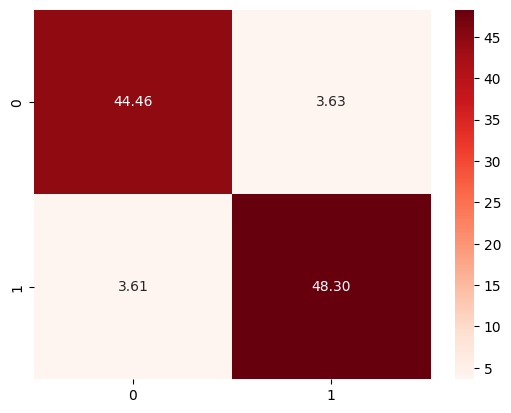

In [19]:
cm=metrics.confusion_matrix(test_predictions,y_test)
cm=(100*cm/cm.sum())

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.2f')